In [1]:
import numpy as np

In [2]:
x = np.arange(0,11)
y = 2 * x ** 2 + 2

In [3]:
class LinearRegression:
    def __init__(self, x, y):
        self.m = len(x)
        self.n = len(x[0]) + 1
        self.x = np.ones((self.m, self.n))
        self.x[:,1:] = x
        self.weights = np.random.randn(self.n)
        self.y = y
        self.all_iterations = 0
    
    def gradient_descent(self,iterations,learning_rate,accuracy_at_cost,penalization = 0):
        x = self.x
        y = self.y
        m = self.m
        n = self.n
        d_weights = np.ones((n))
        weights = self.weights
        for i in range(1, iterations+1):
            h = np.sum(x * weights, axis = 1)
            w = weights
            cost = (1 / (2 * m)) * (sum((h - y) ** 2) + sum(penalization * weights[1:]))
            if round(cost, accuracy_at_cost) == 0:
                print(i, round(cost,accuracy_at_cost))
                break
            if i % (iterations//10 or 1) == 0 or i == 1 or i == iterations:
                print(i, round(cost,accuracy_at_cost))
            for i in range(n):
                d_weights[i] = (1 / m) * sum((h - y)*x[:,i])
            for i in range(n):
                if i == 0:
                    weights[i] = weights[i] - learning_rate * d_weights[i]
                else:
                    weights[i] = weights[i] * (1 - learning_rate * (penalization / m)) - learning_rate * (1 / m) * d_weights[i]
            self.weights = weights
            self.all_iterations += 1
    
    def predict(self, x):
        x = np.array([x]) if x.ndim == 1 else x
        x_ = np.ones((len(x), len(x[0])+1))
        x_[:,1:] = x
        return np.sum(x_*self.weights,axis=1)

In [4]:
normal_equation = lambda x,y: np.linalg.inv(x.T @ x) @ x.T @ y

for i in range(len(x)):
    print("Input: ",x[i],"Predictment: ",model.predict(x[i]),"True value: ",y[i])

In [5]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [6]:
x,y = make_regression(200,1)

In [7]:
model = LinearRegression(x,y)

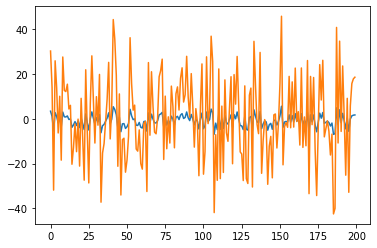

In [8]:
plt.plot(model.predict(x))
plt.plot(y)

In [15]:
model.gradient_descent(10000,0.01,2,0.1)

1 12.45
1000 11.69
2000 10.99
3000 10.35
4000 9.75
5000 9.2
6000 8.7
7000 8.23
8000 7.79
9000 7.39
10000 7.02


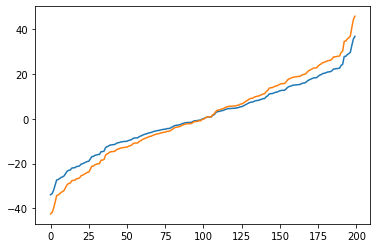

In [16]:
plt.plot(sorted(np.sum(model.x*model.weights,axis=1)))
# plt.plot(sorted(x * normal_equation(x,y)))
plt.plot(sorted(y))